In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

In [1]:
import mediapipe as mp
import cv2
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
import pickle 

# Setup Mediapipe helpers
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [5]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        # THIS IS THE CORRECTED LINE:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [10]:
# This calculates the number of coordinates to save
# It needs the 'results' object from Step 2 to work
try:
    num_coords = len(results.pose_landmarks.landmark) + len(results.face_landmarks.landmark)
    print(f"Number of coordinates: {num_coords}")
except Exception as e:
    print(f"Error: 'results' object not found. Please run Step 2 (the webcam test) for a second and press 'q', then try this cell again.")

Error: 'results' object not found. Please run Step 2 (the webcam test) for a second and press 'q', then try this cell again.


In [7]:
landmarks = ['class']
for val in range(1, num_coords + 1):
    landmarks += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']

In [8]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)
    
print("coords.csv file created successfully with headers.")

coords.csv file created successfully with headers.


In [33]:
# --- CHANGE THIS ---
class_name = "Happy" 
# -------------------

In [35]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concatenate rows
            row = pose_row + face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\venkat\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [37]:
# --- CHANGE THIS ---
class_name = "Sad" 
# -------------------

In [39]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concatenate rows
            row = pose_row + face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\venkat\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [45]:
# --- CHANGE THIS ---
class_name = "Victorious" 
# -------------------

In [47]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concatenate rows
            row = pose_row + face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\venkat\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [49]:
# --- CHANGE THIS ---
class_name = "Angry and ready to fight" 
# -------------------

In [51]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concatenate rows
            row = pose_row + face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\venkat\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [3]:
df = pd.read_csv('coords.csv')

In [5]:
# Check the first 5 rows
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Happy,0.540299,0.512648,-1.046460,0.999916,0.568065,0.434670,-1.034041,0.999879,0.583691,...,-0.022691,0.0,0.602181,0.408697,-0.009342,0.0,0.606717,0.402364,-0.010035,0.0
1,Happy,0.537062,0.510311,-0.989151,0.999919,0.566558,0.434560,-0.979718,0.999883,0.583420,...,-0.022272,0.0,0.598977,0.405141,-0.011126,0.0,0.603101,0.399887,-0.011932,0.0
2,Happy,0.535310,0.508312,-0.980327,0.999921,0.565595,0.434328,-0.971367,0.999885,0.583273,...,-0.022981,0.0,0.599272,0.405682,-0.011572,0.0,0.603404,0.400540,-0.012339,0.0
3,Happy,0.535419,0.507593,-0.961741,0.999923,0.565864,0.434326,-0.951809,0.999886,0.584071,...,-0.022997,0.0,0.603447,0.407693,-0.011212,0.0,0.607604,0.402192,-0.011878,0.0
4,Happy,0.535611,0.506336,-0.928085,0.999925,0.566162,0.434308,-0.917839,0.999887,0.584827,...,-0.022698,0.0,0.605752,0.407361,-0.009761,0.0,0.609897,0.401977,-0.010386,0.0


In [7]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [11]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [13]:
fit_models = {}
for  algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [15]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9994756161510225
rc 0.9931830099632931
rf 0.9994756161510225
gb 1.0


In [17]:
# Save the 'lr' (Logistic Regression) model, as it was the best
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)
    
print("Best model (lr) saved to body_language.pkl")

Best model (lr) saved to body_language.pkl


In [19]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concatenate rows
            row = pose_row + face_row
            
            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            # print(body_language_class, body_language_prob)
            
            # Grab ear coords for display
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                         , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            # Pass silently if no landmarks are detected
            pass
                                 
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\venkat\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\venkat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\venkat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\venkat\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:

In [11]:
# Save the 'lr' (Logistic Regression) model again
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)
    
print("Model successfully re-saved to body_language.pkl")

NameError: name 'fit_models' is not defined

In [2]:
!pip install seaborn matplotlib

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

--- Evaluation for Logistic Regression (lr) ---
Accuracy: 0.9930915371329879

Classification Report:
                          precision    recall  f1-score   support

Angry and ready to fight       1.00      1.00      1.00        70
                   Happy       0.99      1.00      0.99       398
                     Sad       1.00      0.90      0.95        10
              Victorious       1.00      0.97      0.98       101

                accuracy                           0.99       579
               macro avg       1.00      0.97      0.98       579
            weighted avg       0.99      0.99      0.99       579

Confusion Matrix:
[[ 70   0   0   0]
 [  0 398   0   0]
 [  0   1   9   0]
 [  0   3   0  98]]


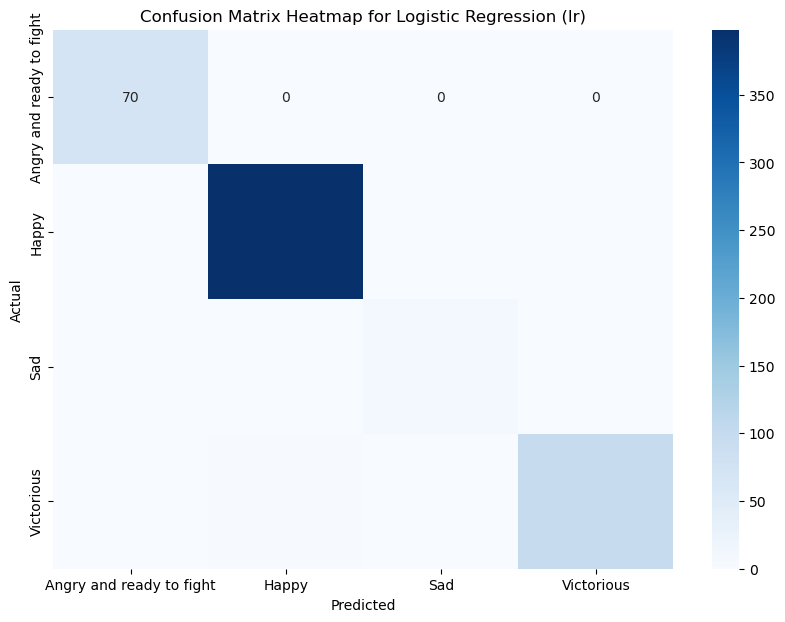

In [26]:
# --- 1. CHOOSE YOUR BEST MODEL ---
# You said 'lr' was your best, so we'll use that.
model = fit_models['lr']
model_name = 'Logistic Regression (lr)'

# --- 2. GET PREDICTIONS ---
# Get the model's predictions on the test data
yhat = model.predict(X_test)

# --- 3. GET ACCURACY & OTHER SCORES ---
print(f"--- Evaluation for {model_name} ---")

# Get Accuracy
acc = accuracy_score(y_test, yhat)
print(f"Accuracy: {acc}\n")

# Get Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, yhat))

# --- 4. GET CONFUSION MATRIX & PLOT HEATMAP ---
print("Confusion Matrix:")
cm = confusion_matrix(y_test, yhat)
print(cm)

# Get the class names from your model to label the chart
class_names = model.classes_

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix Heatmap for {model_name}')
plt.show()

--- Evaluation for Logistic Regression (lr) ---
Accuracy: 0.9994756161510225

Classification Report:
                          precision    recall  f1-score   support

Angry and ready to fight       1.00      1.00      1.00       708
                   Happy       1.00      1.00      1.00       638
                     Sad       1.00      1.00      1.00       315
              Victorious       1.00      1.00      1.00       246

                accuracy                           1.00      1907
               macro avg       1.00      1.00      1.00      1907
            weighted avg       1.00      1.00      1.00      1907

Confusion Matrix:


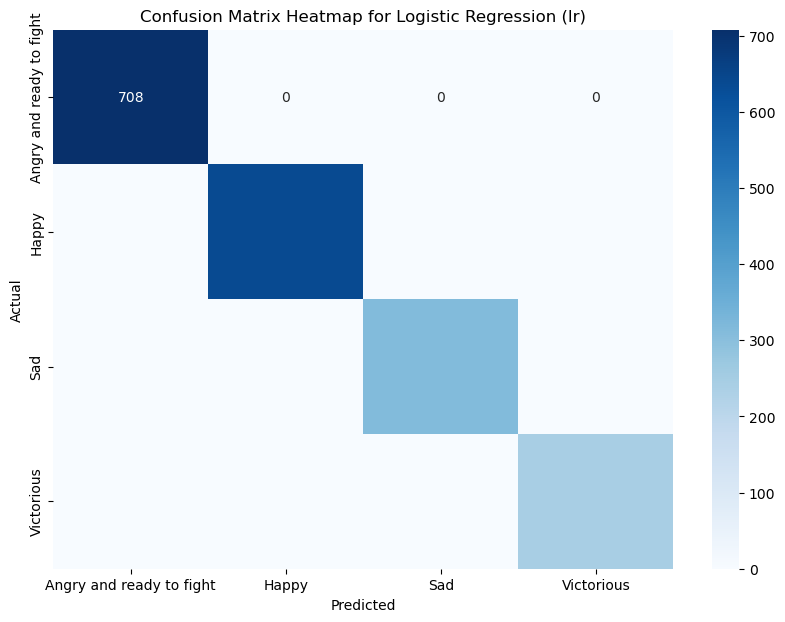

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CHOOSE YOUR BEST MODEL ---
model = fit_models['lr']
model_name = 'Logistic Regression (lr)'

# --- 2. GET PREDICTIONS ---
yhat = model.predict(X_test)

# --- 3. GET ACCURACY & OTHER SCORES ---
print(f"--- Evaluation for {model_name} ---")
acc = accuracy_score(y_test, yhat)
print(f"Accuracy: {acc}\n")

print("Classification Report:")
print(classification_report(y_test, yhat))

# --- 4. GET CONFUSION MATRIX & PLOT HEATMAP ---
print("Confusion Matrix:")
cm = confusion_matrix(y_test, yhat)
class_names = model.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix Heatmap for {model_name}')
plt.show()

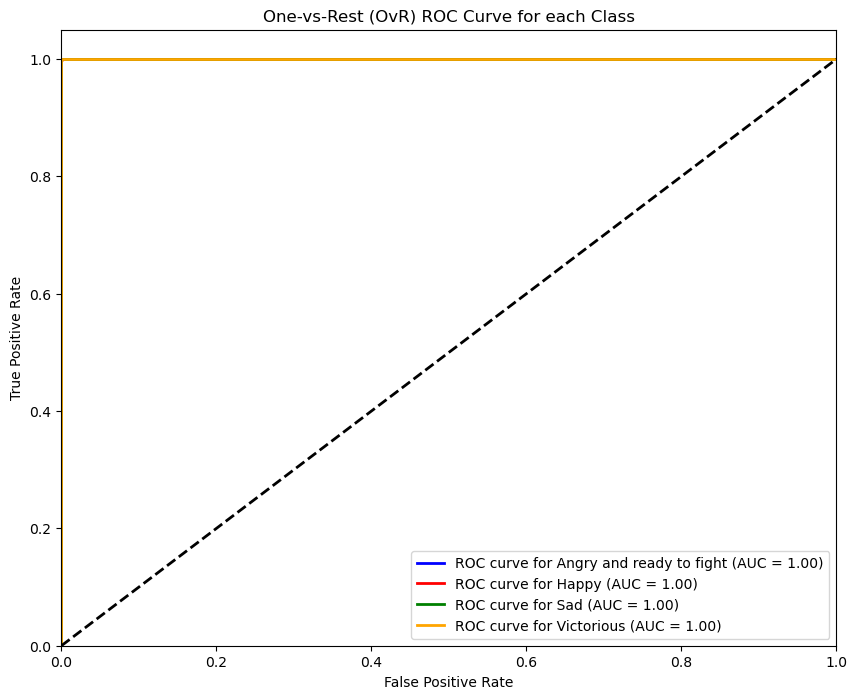

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- 1. Get Model and Classes ---
model = fit_models['lr'] # Use your best model
classes = model.classes_
n_classes = len(classes)

# --- 2. Binarize the true labels ---
# We need to turn 'Happy', 'Sad' into [1,0], [0,1] format
y_test_binarized = label_binarize(y_test, classes=classes)

# --- 3. Get probability scores th ration of the class to make more avaliable  ---
y_score = model.predict_proba(X_test)

# --- 4. Compute ROC curve and AUC for each class ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 5. Plot all ROC curves ---
plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown'] # Add more colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # The "random guess" line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest (OvR) ROC Curve for each Class')
plt.legend(loc="lower right")
plt.show()

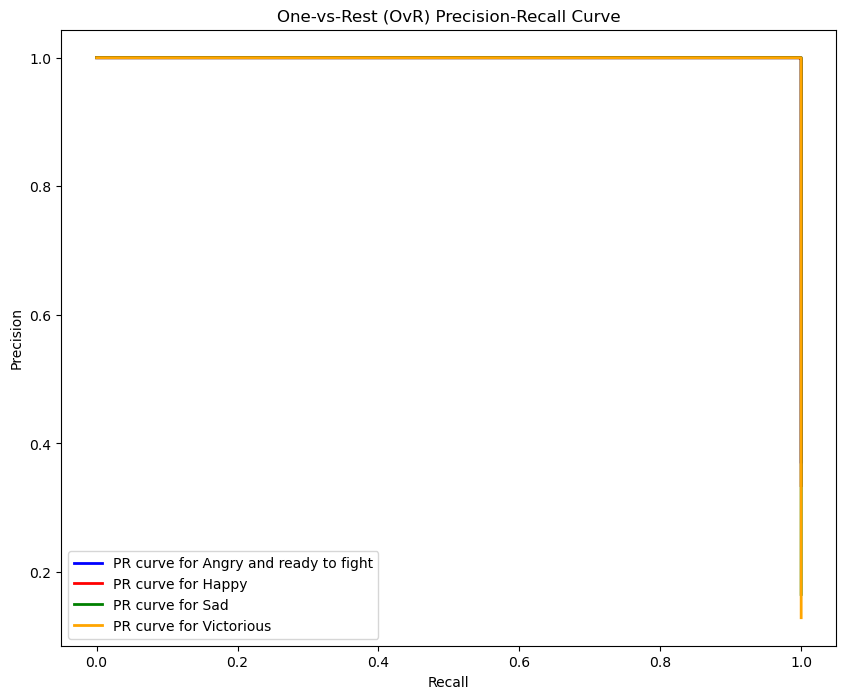

In [23]:
from sklearn.metrics import precision_recall_curve

# --- 1. Use variables from the ROC code ---
# (y_test_binarized, y_score, classes, n_classes, colors)

# --- 2. Compute PR curve for each class ---
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])

# --- 3. Plot all PR curves ---
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve for {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('One-vs-Rest (OvR) Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

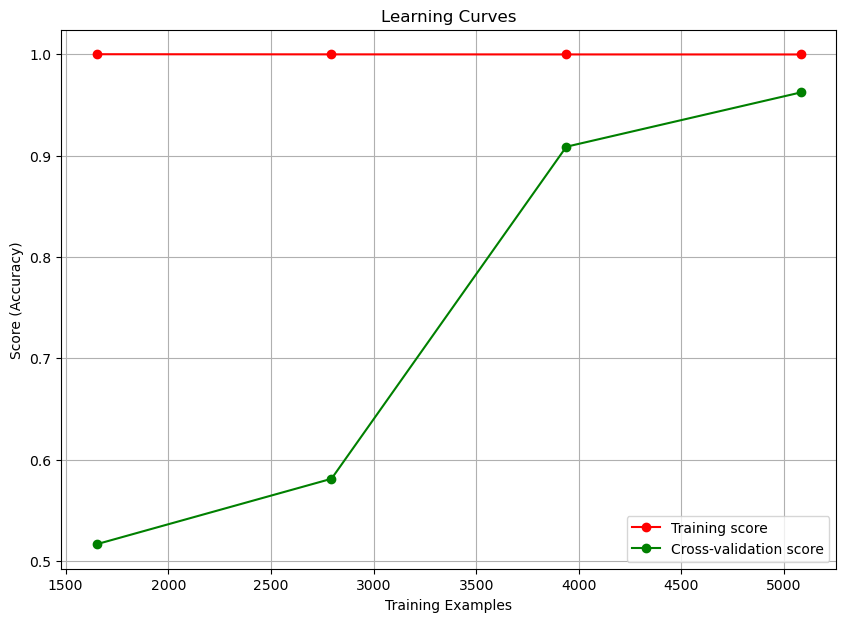

In [25]:
from sklearn.model_selection import learning_curve

# --- 1. Get the full dataset ---
# (Make sure 'df' is loaded from Step 5.1)
X_full = df.drop('class', axis=1)
y_full = df['class']

# --- 2. Get your untrained estimator ---
# (Make sure 'pipelines' is defined from Step 5.2)
estimator = pipelines['lr']

# --- 3. Calculate Learning Curves ---
# This will re-train your model 5 times (cv=5) on 5 different data sizes.
# It can take a moment.
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_full, y_full, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5) # 5 steps: 10%, 30%, 50%, 70%, 100% of data
)

# --- 4. Get mean scores ---
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# --- 5. Plot the curves ---
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score (Accuracy)')
plt.legend(loc="best")
plt.grid()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

# --- 1. Load your full dataset ---
df = pd.read_csv('coords.csv')
X = df.drop('class', axis=1)
y = df['class']

# --- 2. Get your untrained model pipeline ---
# (Make sure 'pipelines' is defined from Step 5.2)
# We'll use 'lr' since it was your best
model_pipeline = pipelines['lr']

# --- 3. Run 10-Fold Cross-Validation ---
# This will train and test your model 10 times.
# cv=10 means 10 folds. n_jobs=-1 uses all your CPU cores.
scores = cross_val_score(model_pipeline, X, y, cv=10, n_jobs=-1)

# --- 4. Get the Results ---
print(f"--- 10-Fold Cross-Validation Scores ---")
print(f"Scores for each fold: {scores}")
print("\n-----------------------------------------")
print(f"Average Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

--- 10-Fold Cross-Validation Scores ---
Scores for each fold: [0.87735849 0.97955975 0.99685535 0.88207547 0.9984252  0.97637795
 0.9984252  1.         1.         0.99527559]

-----------------------------------------
Average Accuracy: 0.9704
Standard Deviation: 0.0461


In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Get 'clean' predictions ---
# This runs cross-validation but returns the predictions for each sample
y_pred = cross_val_predict(model_pipeline, X, y, cv=10, n_jobs=-1)

# --- 2. Print the new, honest report ---
print("--- Honest Classification Report (from Cross-Validation) ---")
print(classification_report(y, y_pred))

# --- 3. Plot the new, honest heatmap ---
print("--- Honest Confusion Matrix (from Cross-Validation) ---")
cm = confusion_matrix(y, y_pred)
class_names = model_pipeline.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Honest Confusion Matrix Heatmap (from Cross-Val Predictions)')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1, 6354]

In [33]:
from sklearn.model_selection import learning_curve
import numpy as np

# --- 1. Get estimator and full dataset (from first cell) ---
estimator = pipelines['lr']

# --- 2. Calculate Learning Curves ---
# This will re-train your model 5 times (cv=5) on 5 different data sizes.
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5) # 5 steps: 10%, 30%, 50%, 70%, 100% of data
)

# --- 3. Get mean scores ---
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# --- 4. Plot the curves ---
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score (Accuracy)')
plt.legend(loc="best")
plt.grid()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1, 6354]


--- Data loaded successfully! Shape: (6354, 2004) ---
--- Model Pipeline Defined ---

--- Running 10-Fold Cross-Validation (This may take a moment)... ---

--- 10-Fold Cross-Validation Scores ---
Scores for each fold: [0.87735849 0.97955975 0.99685535 0.88207547 0.9984252  0.97637795
 0.9984252  1.         1.         0.99685039]
-----------------------------------------
Average Accuracy: 0.9706
Standard Deviation: 0.0462

--- Running Cross-Validation Predictions for Heatmap... ---

--- Honest Classification Report (from Cross-Validation) ---
                          precision    recall  f1-score   support

Angry and ready to fight       0.97      0.99      0.98      2209
                   Happy       0.97      0.96      0.97      2192
                     Sad       0.99      0.98      0.99      1078
              Victorious       0.95      0.93      0.94       875

                accuracy                           0.97      6354
               macro avg       0.97      0.97      0.

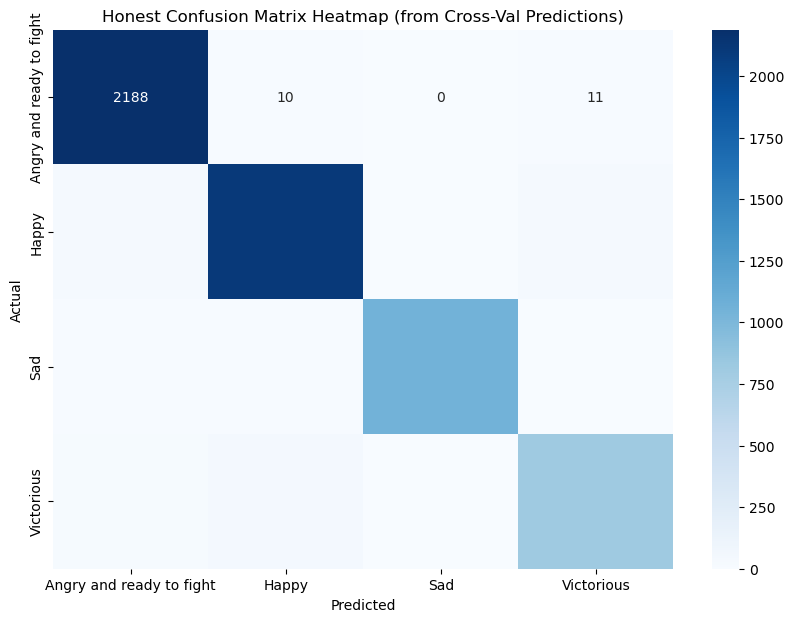


--- Generating Learning Curves (This is the slowest part)... ---
--- Plotting Learning Curves ---


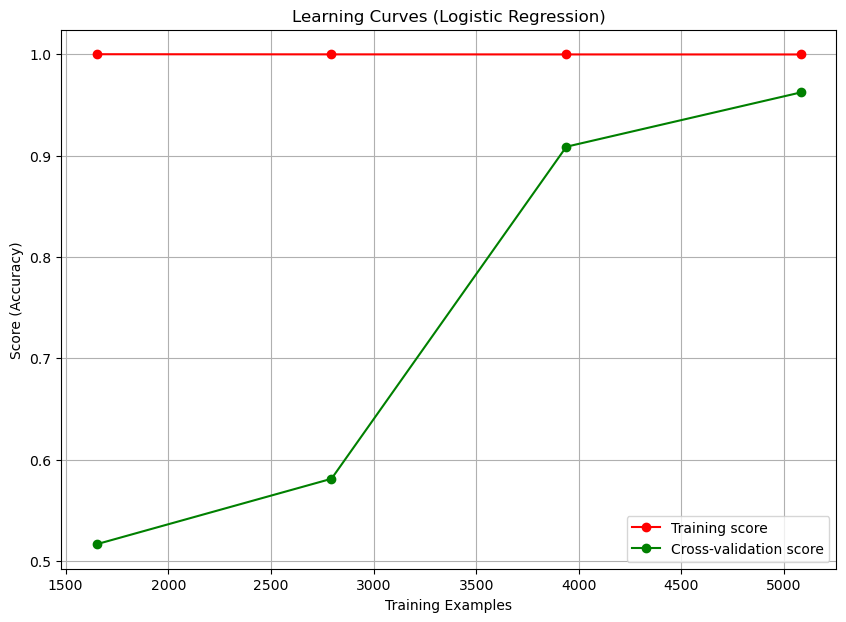

In [37]:
# --- 1. Install & Import Libraries ---
!pip install scikit-learn pandas seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("--- Libraries Imported ---")

# --- 2. Load Your Data --
# Make sure you have uploaded 'coords.csv' to Colab first!
try:
    df = pd.read_csv('coords.csv')
    X = df.drop('class', axis=1)
    y = df['class']
    print(f"--- Data loaded successfully! Shape: {X.shape} ---")
except FileNotFoundError:
    print("!!! ERROR: 'coords.csv' not found. Please upload it first and re-run this cell. !!!")

if 'df' in locals():
    # --- 3. Define Model Pipeline ---
    # We use the 'lr' model as it was your best
    pipelines = {
        'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
        'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
        'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
        'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    }
    model_pipeline = pipelines['lr']
    print("--- Model Pipeline Defined ---")


    # --- 4. Get "Honest" Accuracy (Cross-Validation) ---
    print("\n--- Running 10-Fold Cross-Validation (This may take a moment)... ---")
    scores = cross_val_score(model_pipeline, X, y, cv=10, n_jobs=-1)
    
    print(f"\n--- 10-Fold Cross-Validation Scores ---")
    print(f"Scores for each fold: {scores}")
    print("-----------------------------------------")
    print(f"Average Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")


    # --- 5. Get "Honest" Confusion Matrix & Report ---
    print("\n--- Running Cross-Validation Predictions for Heatmap... ---")
    y_pred = cross_val_predict(model_pipeline, X, y, cv=10, n_jobs=-1)
    
    print("\n--- Honest Classification Report (from Cross-Validation) ---")
    print(classification_report(y, y_pred))
    
    print("\n--- Plotting Honest Confusion Matrix ---")
    cm = confusion_matrix(y, y_pred)
    class_names = np.unique(y) # Get all unique class names
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Honest Confusion Matrix Heatmap (from Cross-Val Predictions)')
    plt.show()


    # --- 6. Get Learning Curves (to check for overfitting) ---
    print("\n--- Generating Learning Curves (This is the slowest part)... ---")
    train_sizes, train_scores, test_scores = learning_curve(
        model_pipeline, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5) # 5 steps
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    print("--- Plotting Learning Curves ---")
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title('Learning Curves (Logistic Regression)')
    plt.xlabel('Training Examples')
    plt.ylabel('Score (Accuracy)')
    plt.legend(loc="best")
    plt.grid()
    plt.show()